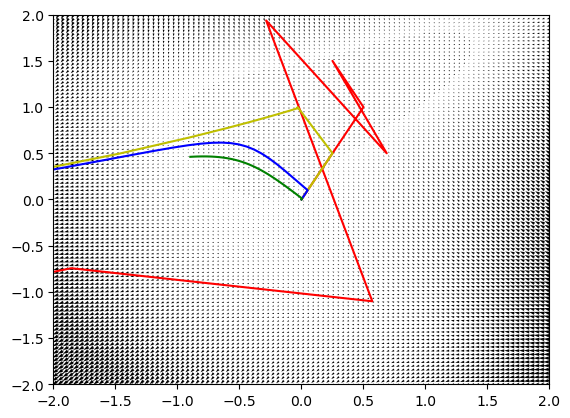

In [3]:
# Simulate the trajectory of a vector in a vector field

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Create a vector field
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
U = -1 - X**2 + Y
V = 1 + X - Y**2

# initialize a vector at the middle of the vector field
x0 = 0
y0 = 0
U0 = .5
V0 = 1

# store the trajectory of the vector until it reaches the boundary
x_list = [x0]
y_list = [y0]
for i in range(100):
    x0 += U0
    y0 += V0
    U0 = -1 - x0**2 + y0
    V0 = 1 + x0 - y0**2
    x_list.append(x0)
    y_list.append(y0)
    if x0 < -2 or x0 > 2 or y0 < -2 or y0 > 2:
        break

# initialize a vector at the middle of the vector field
x0 = 0
y0 = 0
U0 = .5
V0 = 1

# store the trajectory of the vector until it reaches the boundary
x_list_coarse = [x0]
y_list_coarse = [y0]
for i in range(100):
    x0 += U0/2
    y0 += V0/2
    U0 = -1 - x0**2 + y0
    V0 = 1 + x0 - y0**2
    x_list_coarse.append(x0)
    y_list_coarse.append(y0)
    if x0 < -2 or x0 > 2 or y0 < -2 or y0 > 2:
        break

# initialize a vector at the middle of the vector field
x0 = 0
y0 = 0
U0 = .5
V0 = 1

# store a finer trajectory of the vector where it's recalculated at 10 times the resolution
x_list_fine = [x0]
y_list_fine = [y0]
for i in range(100):
    x0 += U0/10
    y0 += V0/10
    U0 = -1 - x0**2 + y0
    V0 = 1 + x0 - y0**2
    x_list_fine.append(x0)
    y_list_fine.append(y0)
    if x0 < -2 or x0 > 2 or y0 < -2 or y0 > 2:
        break

# initialize a vector at the middle of the vector field
x0 = 0
y0 = 0
U0 = .5 - x0**2 + y0
V0 = 1 + x0 - y0**2

# store a finer trajectory of the vector where it's recalculated at 100 times the resolution
x_list_finer = [x0]
y_list_finer = [y0]
for i in range(100):
    x0 += U0/100
    y0 += V0/100
    U0 = -1 - x0**2 + y0
    V0 = 1 + x0 - y0**2
    x_list_finer.append(x0)
    y_list_finer.append(y0)
    if x0 < -2 or x0 > 2 or y0 < -2 or y0 > 2:
        break



# plot the vector field and the trajectory
fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.plot(x_list, y_list, 'r')
ax.plot(x_list_coarse, y_list_coarse, 'y')
ax.plot(x_list_fine, y_list_fine, 'b')
ax.plot(x_list_finer, y_list_finer, 'g')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()


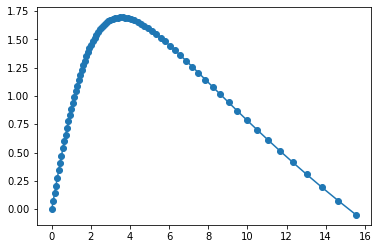

In [107]:
# Simulate an object thrown in the air
# The object is thrown at an angle of 45 degrees with an initial velocity of 10 m/s
# The object is subject to the force of gravity where gravity is defined by the following equation:
# g = -9.8 m/s^2 - 1/x where x is the distance of the object from the origin



# initialize the object at the origin
x0 = 0
y0 = 0

# initialize the velocity of the object
v0 = 10
theta = np.pi/4
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

# initialize the acceleration of the object
ax0 = 0
ay0 = -9.8

# initialize the time step
dt = .01

# store the trajectory of the object until it reaches the ground
x_list = [x0]
y_list = [y0]

while True:
    x0 += vx0*dt
    y0 += vy0*dt

    vx0 += ax0*dt
    vy0 += ay0*dt

    ax0 = 4*x0*np.sqrt(x0**2 + y0**2)
    ay0 = -9.8 - 4*np.sqrt(x0**2 + y0**2)

    x_list.append(x0)
    y_list.append(y0)
    if y0 < 0:
        break

# plot the trajectory of the object
fig, ax = plt.subplots()
ax.plot(x_list, y_list)
ax.scatter(x_list, y_list)



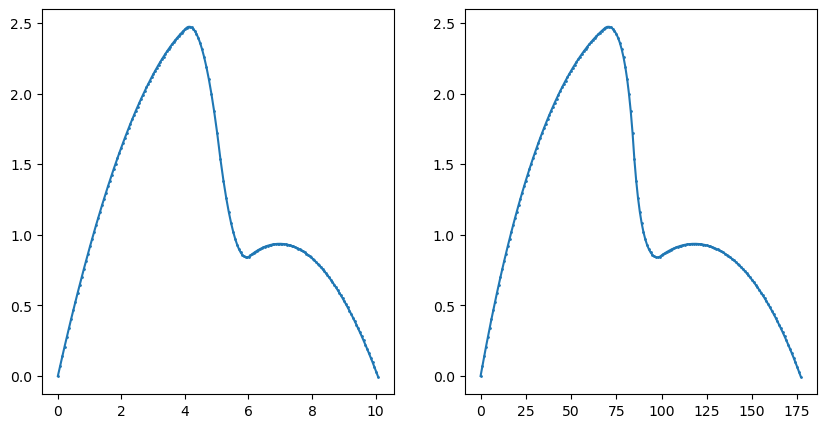

In [9]:
# Simulate the above again but with a constant change in position in the x direction
# The object is thrown at an angle of 45 degrees with an initial velocity of 10 m/s
# The object is subject to the force of gravity where gravity is -9.8 m/s^2
# gravity is half as strong between x = 4 and x = 6

courant = 0.001

# initialize the object at the origin
x0 = 0
y0 = 0

# initialize the velocity of the object
v0 = 10
theta = np.pi/4
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

# initialize the acceleration of the object
ax0 = 0
ay0 = -9.8

# initialize the time step
dt = 0.01

# store the trajectory of the object until it reaches the ground
x_list = [x0]
y_list = [y0]

for i in range(1000):


    x0 += vx0*dt
    y0 += vy0*dt

    vx0 += ax0*dt
    vy0 += ay0*dt

    if x0 > 4 and x0 < 5:
        ay0 = -100
    elif x0 > 5 and x0 < 6:
        ay0 = 100
    else:
        ay0 = -9.8

    x_list.append(x0)
    y_list.append(y0)
    
    # smaller timestep for larger velocities
    dt = courant*np.sqrt(vx0**2 + vy0**2)

    if y0 < 0:
        break

# plot the trajectory of the object in two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x_list, y_list)
ax[0].scatter(x_list, y_list, s=1)

ax[1].plot(y_list)
ax[1].scatter(range(len(y_list)), y_list, s=1)


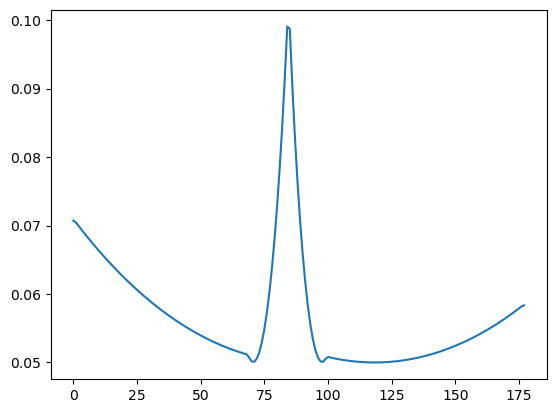

In [7]:
plt.plot(np.gradient(x_list))

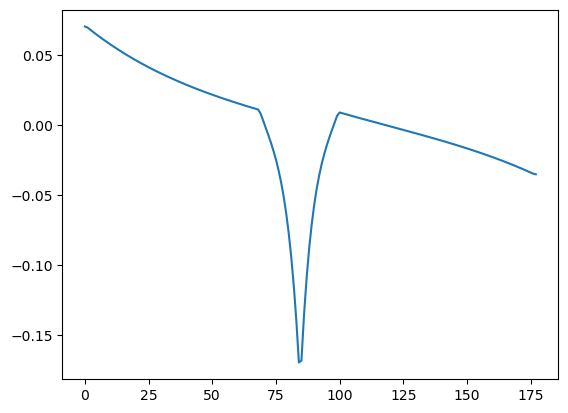

In [8]:
plt.plot(np.gradient(y_list))

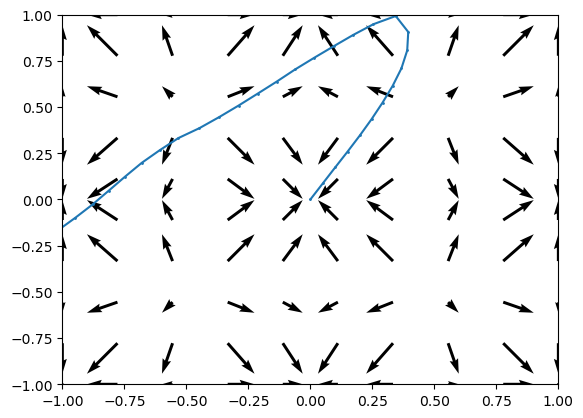

In [4]:
# electron density gradient in a plasma where the electron density is defined by the following equation:
# n = 1 + 0.1*np.cos(2*np.pi*x) + 0.1*np.cos(2*np.pi*y)
# The electron density gradient is defined by the following equation:
# dn/dx = -0.2*np.pi*np.sin(2*np.pi*x)
# dn/dy = -0.2*np.pi*np.sin(2*np.pi*y)

# initialize the electron density gradient
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)
U = -0.2*np.pi*np.sin(2*np.pi*X)
V = -0.2*np.pi*np.sin(2*np.pi*Y)

# initialize a vector at the middle of the electron density gradient
x0 = 0
y0 = 0

# initialize the velocity of the vector
v0 = 1
theta = np.pi/3
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

# initialize the acceleration of the vector
ax0 = 0
ay0 = 0

# initialize the time step
dt = .1

# store the trajectory of the vector until it reaches the boundary
x_list = [x0]
y_list = [y0]

while True:
    x0 += vx0*dt
    y0 += vy0*dt

    vx0 += ax0*dt
    vy0 += ay0*dt
    
    # interpolate the electron density gradient at the current position of the vector
    ax0 = np.interp(x0, x, U[int((y0 + 1)/2*10)])
    ay0 = np.interp(y0, y, V[int((x0 + 1)/2*10)])

    x_list.append(x0)
    y_list.append(y0)
    if x0 < -1 or x0 > 1 or y0 < -1 or y0 > 1:
        break

    # dynamic time step as a function of the velocity and dx to ensure the vector always moves the same distance
    # last distance moved
    dx = np.sqrt((x_list[-1] - x_list[-2])**2 + (y_list[-1] - y_list[-2])**2)
    # current velocity
    v = np.sqrt(vx0**2 + vy0**2)
    # new time step
    dt = dx/v
    
    


# plot the electron density gradient and the trajectory of the vector
fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.plot(x_list, y_list)
ax.scatter(x_list, y_list, s=1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()





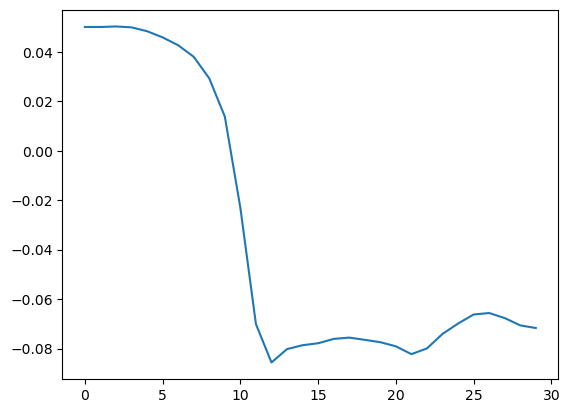

In [5]:
plt.plot(np.gradient(x_list))
# plot

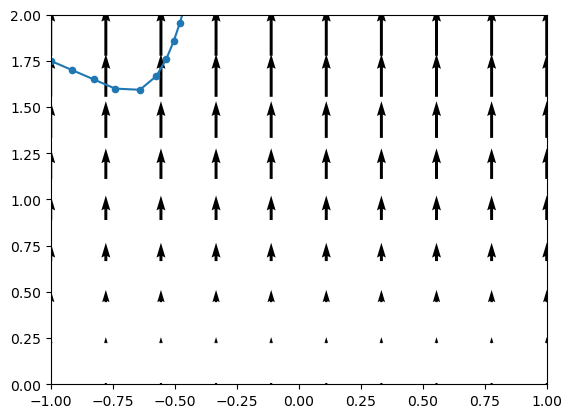

In [46]:
# linearly changing electron density gradient in the y direction
# initialize the electron density gradient
x = np.linspace(-1, 1, 10)
y = np.linspace(0, 2, 10)
X, Y = np.meshgrid(x, y)
U = np.zeros((10, 10))
V = .2*Y

# initialize a vector at the middle of the electron density gradient
x0 = -1
y0 = 1.75

# initialize the velocity of the vector
v0 = .1
theta = -np.pi/6
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

# initialize the acceleration of the vector
ax0 = 0
ay0 = 0

# initialize the time step
dt = 1

# store the trajectory of the vector until it reaches the boundary
x_list = [x0]
y_list = [y0]

while True:
    x0 += vx0*dt
    y0 += vy0*dt

    vx0 += ax0*dt
    vy0 += ay0*dt
    
    # interpolate the electron density gradient at the current position of the vector
    ax0 = np.interp(x0, x, U[int((y0)/np.max(y)*10)-1])
    ay0 = np.interp(y0, y, V[int((x0)/np.max(x)*10)-1])

    x_list.append(x0)
    y_list.append(y0)
    if x0 < -1 or x0 > 1 or y0 < 0 or y0 > 2:
        break

    # dynamic time step as a function of the velocity and dx to ensure the vector always moves the same distance
    # last distance moved
    dx = np.sqrt((x_list[-1] - x_list[-2])**2 + (y_list[-1] - y_list[-2])**2)
    # current velocity
    v = np.sqrt(vx0**2 + vy0**2)
    # new time step
    dt = dx/v

# plot the electron density gradient and the trajectory of the vector
fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.plot(x_list, y_list)
ax.scatter(x_list, y_list, s=20)
ax.set_xlim(-1, 1)
ax.set_ylim(0,2)
plt.show()


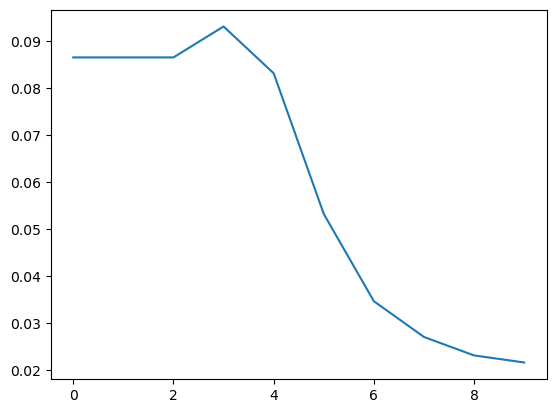

In [47]:
plt.plot(np.gradient(x_list))

In [44]:
a = np.linspace(0, 1, 10)
# np.interp is a linear interpolation function that takes in a value and a list of values and returns the interpolated value between the 
print(np.interp(4, np.linspace(0,9, 10), np.linspace(0, 2, 8)))

ValueError: fp and xp are not of the same length.

In [43]:
np.linspace(0,2,10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])